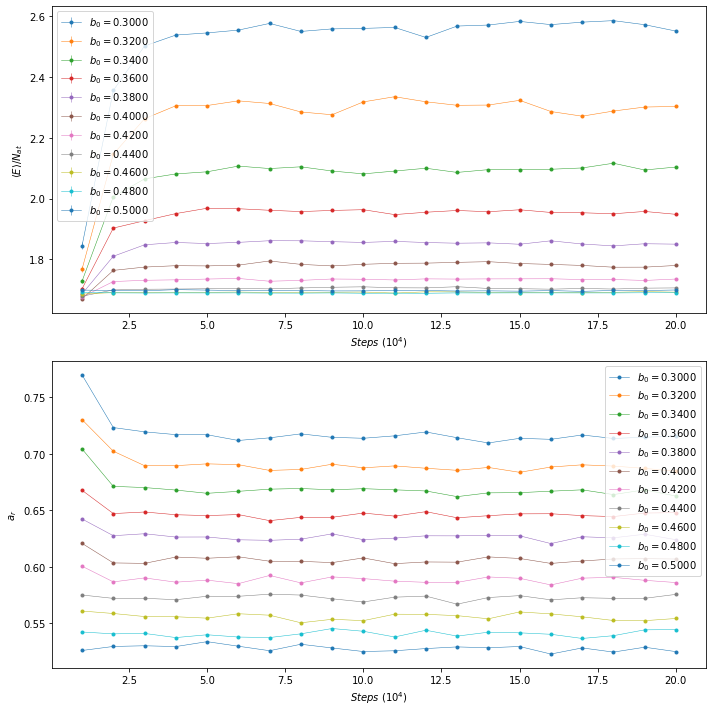

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
#matplotlib.use('nbagg')

fig, ax = plt.subplots(2,1, figsize=(10,10))
N_search = 11
prefix = 'c0.006'
b0 = np.linspace(0.3, 0.50, 11)
#_ = ax[0].set_ylim(1.,2.5)
#_ = ax[0].set_xlim(0,12)
_ = ax[0].set_xlabel(r'${Steps}\,\,(10^4)$')
_ = ax[0].set_ylabel(r'$\langle E \rangle /N_{at}$')

_ = ax[1].set_xlabel(r'${Steps}\,\,(10^4)$')
_ = ax[1].set_ylabel(r'$a_r$')


for i in range(N_search):
    out_file = 'output/%s_output_%d.txt' % (prefix,i)
    data = np.genfromtxt(out_file, skip_header=1)
    steps = data[:,0]
    energies = data[:,1]
    errors = data[:,2]
    acc_ratios = data[:,3]
    
    _ = ax[0].errorbar(steps, energies, errors, lw=0.5, marker='.', label=r'$b_0=%5.4f$' % b0[i])
    _ = ax[1].plot(steps, acc_ratios, lw=0.5, marker='.', label=r'$b_0=%5.4f$' % b0[i])

ax[0].legend()
ax[1].legend()
fig.tight_layout()
#fig.savefig('images/b010.pdf')
    

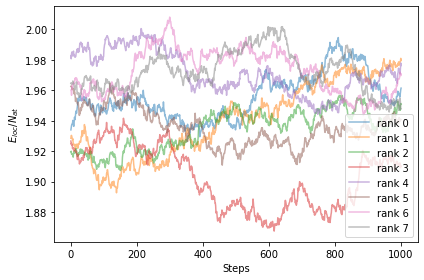

In [40]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
_ = ax.set_xlabel('Steps')
_ = ax.set_ylabel(r'$E_{loc}/N_{at}$')
E = 1.51538704

prefix = 'c0.006'
run = '3'
Nprocs=8
for i in range(Nprocs):
    out_file = 'energies/%s_my_energy_%s_%d.txt' % (prefix,run,i)
    data = np.genfromtxt(out_file, skip_header=1)
    steps = data[:,0]
    energies = data[:,1]
    _ = ax.plot(steps, energies, alpha=0.5, label='rank %d' % i)

ax.legend()
fig.tight_layout()
#fig.savefig('images/b0.10_energy_runtime.pdf')

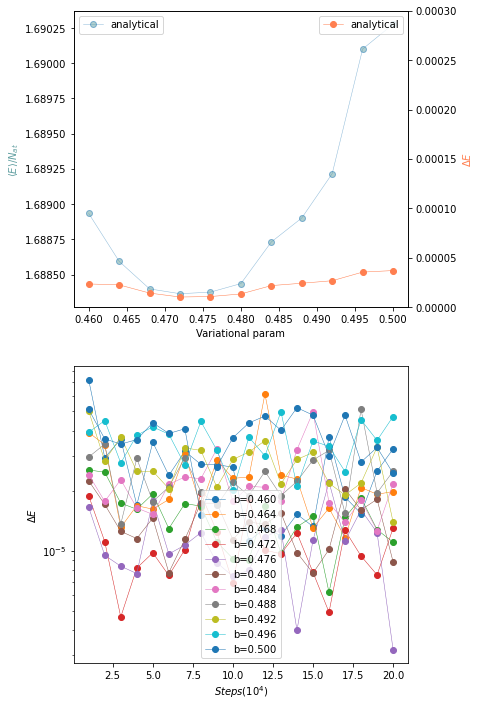

In [43]:
#graph of the fluctuations
import numpy as np 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(6,12))
ax_err = ax[0].twinx()

prefix = 'c0.001'
N_search = 11
best_energies = np.empty(N_search)
mean_fluctuations = np.empty(N_search)
b = np.linspace(0.46,0.50,N_search)
_ = ax[1].set_yscale('log')

for i in range(N_search):
    out_file = 'output/%s_output_%d.txt' % (prefix,i)
    data = np.genfromtxt(out_file, skip_header=1)
    steps = data[:,0]
    energies = data[:,1]
    errors = data[:,2]
    acc_ratios = data[:,3]
    
    best_energies[i] = np.mean(energies[1:])
    mean_fluctuations[i] = np.mean(errors[1:])
    _ = ax[1].plot(steps, errors, label='b=%4.3f' % b[i], marker='o', lw=0.5)
    
#_ = ax[0].set_ylim(1.5,2.5)
_ = ax[0].set_xlabel('Variational param')
_ = ax[0].set_ylabel(r'$\langle E \rangle / N_{at}$', c='cadetblue')
_ = ax[0].plot(b, best_energies, marker='o', markerfacecolor='cadetblue', lw=0.5, label='analytical', alpha=0.5)

_ = ax_err.set_ylim(0.0, 0.0003)
_ = ax_err.set_ylabel(r'$\Delta E$', c='coral')
_ = ax_err.plot(b, mean_fluctuations, c = 'coral', marker='o', markerfacecolor='coral', lw=0.5, label='analytical')

#mean field approximation (no harmonic trap)
#na3 = 100 * 0.00433**3.0 
#E_mf = 4.0 * np.pi * na3 * 0.50/0.00433**2.0 
#_ = ax[0].axhline(y=E_mf, linestyle='--', label='mean field energy')

#min_ene = best_energies[1]
#min_ene2 = best_energies[2]
#print(min_ene, min_ene2, min_ene2-min_ene)
#_ = ax[1].axhline(y = min_ene2 - min_ene, color='k', linestyle='--')
_ = ax[1].set_xlabel(r'${Steps} (10^4)$')
_ = ax[1].set_ylabel(r'$\Delta E$')
_ = ax[1].legend()

_ = ax[0].legend()
_ = ax_err.legend()

#fig.savefig('images/b010.pdf')

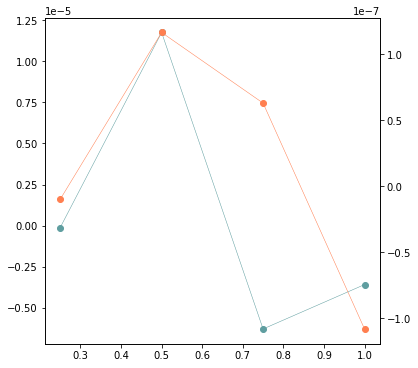

In [97]:
#graph of the fluctuations
import numpy as np 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
ax_err = ax.twinx()

prefix = '100_atms'
N_search = 5
best_energies = np.empty(N_search-1)
best_energies_numeric = np.empty(N_search-1)
mean_fluctuations = np.empty(N_search-1)
mean_fluctuations_numeric = np.empty(N_search-1)
b = np.linspace(0.0,1.0,5)

for i in range(1,N_search):
    out_file = 'output/%s_output_%d.txt' % (prefix,i)
    data = np.genfromtxt(out_file, skip_header=1)
    steps = data[:,0]
    energies = data[:,1]
    errors = data[:,2]
    acc_ratios = data[:,3]
    
    best_energies[i-1] = np.mean(energies[3:])
    mean_fluctuations[i-1] = np.mean(errors[3:])


prefix = '100_atms_numeric'
for i in range(1,N_search):
    out_file = 'output/%s_output_%d.txt' % (prefix,i)
    data = np.genfromtxt(out_file, skip_header=1)
    steps = data[:,0]
    energies = data[:,1]
    errors = data[:,2]
    acc_ratios = data[:,3]
    
    best_energies_numeric[i-1] = np.mean(energies[3:])
    mean_fluctuations_numeric[i-1] = np.mean(errors[3:])
    
_ = ax.plot(b[1:], best_energies - best_energies_numeric, color='cadetblue', lw=0.5, marker='o')
_ = ax_err.plot(b[1:], mean_fluctuations - mean_fluctuations_numeric, color='coral', lw=0.5, marker='o')

In [139]:
a = np.linspace(0.46,0.50,11)
a

array([0.46 , 0.464, 0.468, 0.472, 0.476, 0.48 , 0.484, 0.488, 0.492,
       0.496, 0.5  ])

Minimum energy : 1.6883113
Variational params : b0 = 0.476   b1 = 0.0008
[1.68835166 1.68836713 1.68834054 1.68832881 1.68831133 1.68831953
 1.68833072 1.68831277 1.68832855 1.68836481 1.68837046]
Minimum error : 0.0000031
Variational params : b0 = 0.472   b1 = 0.0014
[4.82294118e-06 4.34529412e-06 3.48705882e-06 3.53058824e-06
 3.70647059e-06 3.24823529e-06 3.71058824e-06 3.11294118e-06
 3.78588235e-06 3.89000000e-06 3.90117647e-06]


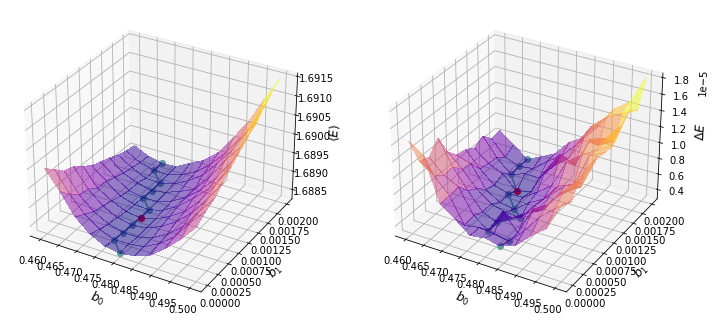

In [67]:
#trying to do the 3D surface plot
if __name__ == '__main__' : 
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits import mplot3d
    from matplotlib import cm
    
    N_search=11
    b0 = np.linspace(0.46,0.5,N_search)
    b1 = np.linspace(0.000,0.002,11)
    #prefixes = ['a%f'%b1[i] for i in range(len(b1))]
    b0, b1 = np.meshgrid(b0,b1)
    
    best_ene = np.empty(N_search)
    best_err = np.empty(N_search)
    
    prefixes = ['c0.0','c0.0002','c0.0004','c0.0006','c0.0008','c0.001','c0.0012',\
                'c0.0014','c0.0016','c0.0018','c0.002']
    d3_ene = np.empty( (len(prefixes),N_search) )
    d3_err = np.empty( (len(prefixes),N_search) )

    for (idx,prefix) in enumerate(prefixes):
        for i in range(N_search):
            output_file = 'output/%s_output_%d.txt' % (prefix,i)
            data = np.genfromtxt(output_file, skip_header=1)
            energies = data[:,1]
            errors = data[:,2]
            best_ene[i] = np.mean(energies[3:])
            best_err[i] = np.mean(errors[3:])
            j = i*N_search
        for i in range(N_search):
            d3_ene[idx,i] = best_ene[i]
            d3_err[idx,i] = best_err[i]
            
    fig, ax = plt.subplots(1,2,figsize=(12,6),subplot_kw={'projection':'3d'})
    
    #axis labels
    _ = ax[0].set_xlabel(r'$b_0$', fontsize=12)
    _ = ax[0].set_ylabel(r'$b_1$', fontsize=12)
    _ = ax[0].set_zlabel(r'$\langle E \rangle$', fontsize=12)
    
    _ = ax[1].set_xlabel(r'$b_0$', fontsize=12)
    _ = ax[1].set_ylabel(r'$b_1$', fontsize=12)
    _ = ax[1].set_zlabel(r'$\Delta E$', fontsize=12)
    
    surf = ax[0].plot_surface(b0, b1, d3_ene, cmap=cm.plasma,
           linewidth=0.5, antialiased=False,alpha=0.5)
    #print(d3_err)
    surf = ax[1].plot_surface(b0, b1, d3_err, cmap=cm.plasma,
                             linewidth=0.5, antialiased=False, alpha=0.5)
    #_ = ax[0].view_init(azim=180, elev=0)
    #_ = ax[1].view_init(azim=180,elev=0)
    minima_ene = np.empty(len(prefixes))
    minima_b0 = np.empty(len(prefixes))
    minima_b1 = np.empty(len(prefixes))
    for i in range(len(prefixes)):
        idx = np.argmin(d3_ene[i,:])
        minima_ene[i] = d3_ene[i,idx]
        minima_b0[i] = b0[i,idx]
        minima_b1[i] = b1[i,idx]
    minimum_idx = np.argmin(minima_ene)
    minimum_ene = minima_ene[minimum_idx]
    minimum_b0 = minima_b0[minimum_idx]
    minimum_b1 = minima_b1[minimum_idx]
    ax[0].plot(minima_b0,minima_b1,minima_ene, marker='o', color='cadetblue')
    ax[0].plot(minimum_b0,minimum_b1,minimum_ene, marker='o', color='red')
    print('Minimum energy : %8.7f' % minimum_ene)
    print('Variational params : b0 = %4.3f   b1 = %5.4f' % (minimum_b0,minimum_b1))
    print(minima_ene)
    
    minima_err = np.empty(len(prefixes))
    minima_b0 = np.empty(len(prefixes))
    minima_b1 = np.empty(len(prefixes))
    for i in range(len(prefixes)):
        idx = np.argmin(d3_err[i,:])
        minima_err[i] = d3_err[i,idx]
        minima_b0[i] = b0[i,idx]
        minima_b1[i] = b1[i,idx]
    minimum_idx = np.argmin(minima_err)
    minimum_err = minima_err[minimum_idx]
    minimum_b0 = minima_b0[minimum_idx]
    minimum_b1 = minima_b1[minimum_idx]
    ax[1].plot(minima_b0,minima_b1,minima_err, marker='o',color='cadetblue')
    ax[1].plot(minimum_b0,minimum_b1,minimum_err, marker='o', color='red')
    print('Minimum error : %8.7f' % minimum_err)
    print('Variational params : b0 = %4.3f   b1 = %5.4f' % (minimum_b0,minimum_b1))
    print(minima_err)
    
    fig.savefig('variational_mesh.pdf')

In [30]:
a = np.linspace(0.47,0.49,21)
print(a)

[0.47  0.471 0.472 0.473 0.474 0.475 0.476 0.477 0.478 0.479 0.48  0.481
 0.482 0.483 0.484 0.485 0.486 0.487 0.488 0.489 0.49 ]


In [44]:
a = np.linspace(0.0,0.001,6)
print(a)

[0.     0.0002 0.0004 0.0006 0.0008 0.001 ]
